# **Let's Begin Project !**

## **Task 1:- Web Scrapping**

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
import re

## **Scrapping Movies Data**

In [ ]:
# URL from which movies data is fetched
url="https://www.justwatch.com/in/movies?release_year_from=2000"

# Sending an HTTP GET request to the URL
response = requests.get(url)

# Parsing HTML content with Beautiful Soup
soup = BeautifulSoup(response.text,'html.parser')


## **Scrapping Movie Title**

In [ ]:
# Movie title

movie_title_list=[]# List to store all movie title

# Extracting all movie titles from <a> tag and storing them in movie_titles
movie_titles = soup.find_all('a',class_='title-list-grid__item--link',attrs={'href':True})

# Extracting each movie title from movie_titles and storing in movie_title_list
for movie_title in movie_titles:

    # Extract the 'href' attribute value, which contains the movie title
    data_id_value = movie_title['href']

    # Removing the '/in/movie/' prefix to get the clean movie title
    data_id_value = data_id_value.replace("/in/movie/","")

    # Converting the movie title to uppercase and appending to the list
    movie_title_list.append(data_id_value.upper())


## **Scrapping Movie URL's**

In [ ]:
# Movie url

movie_url_list=[] # List to store all movie urls

# For every movie title present in movies_title_list , Finding their url
for movie in movie_title_list:

    # Constructing the absolute URL for fetching each movie
    absolute_url = 'https://www.justwatch.com/in/movie/' + movie
    movie_url_list.append(absolute_url)

## **Scrapping Release Year**

In [ ]:
# Movie release year
movie_release_year_list = []# List to store all movie release year

# For every movie title present in movies_title_list , Finding their release year
for movie in movie_title_list:

    # Constructing the absolute URL for fetching each movie
    absolute_url = 'https://www.justwatch.com/in/movie/' + movie

    # Sending an HTTP GET request to the
    response_ry = requests.get(absolute_url)

    # Parsing HTML content with Beautiful Soup
    soup_ry = BeautifulSoup(response_ry.text,'html.parser')
    movie_release_year =soup_ry.find('span',class_='text-muted').text.strip()
    movie_release_year=movie_release_year.replace("(","")
    movie_release_year=movie_release_year.replace(")","")
    movie_release_year_list.append(movie_release_year)


## **Scrapping Genres**

In [ ]:
# Movie genre

movie_genre_list = []# List to store all movie genre

# For every movie title present in movies_title_list , Finding their genre
for movie in movie_title_list:

    # Constructing the absolute URL for fetching each movie
    absolute_url = 'https://www.justwatch.com/in/movie/' + movie
    response_g = requests.get(absolute_url)
    soup = BeautifulSoup(response_g.text,'html.parser')

    # Selecting only those h3 whose heading is genres
    h3_element = soup.find('h3', class_='detail-infos__subheading', string='Genres')

    if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            movie_genre_list.append(div_element.text.strip())
        else:
            movie_genre_list.append("Genre Not Listed")
    else:
         movie_genre_list.append("Genre Not Listed")


## **Scrapping IMDB Rating**

In [ ]:
# Movie Imdb Rating

movie_imdb_list = []# List to store all movie imdb rating

# For every movie title present in movies_title_list , Finding their Imdb Rating
for movie in movie_title_list:

    # Constructing the absolute URL for fetching each movie
    absolute_url = 'https://www.justwatch.com/in/movie/' + movie
    response_g = requests.get(absolute_url)
    soup = BeautifulSoup(response_g.text, 'html.parser')

    # Selecting only those h3 whose heading is Rating
    h3_element = soup.find('h3', class_='detail-infos__subheading', string='Rating')

    if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            inside_div = div_element.find_all('div', class_='jw-scoring-listing__rating')

            # Check if inside_div is non-empty
            if inside_div:
                inside_div_last = inside_div[-1] # extracting last div of inside div as last div elemnt contains span (in which last span contains rating)

                # Check if inside_div_last is non-empty
                if inside_div_last:
                    span_all = inside_div_last.find_all('span')

                    # Check if span_all is non-empty
                    if span_all:
                        span_last = span_all[-1] # Here we are extracting rating from the last span(span_last) inside last div(inside_div_last) of main div_element(div_element)
                        movie_imdb_list.append(span_last.text.strip())
                    else:
                        movie_imdb_list.append("Imdb Rating Not Listed.")
                else:
                    movie_imdb_list.append("Imdb Rating Not Listed.")
            else:
                movie_imdb_list.append("Imdb Rating Not Listed.")
        else:
            movie_imdb_list.append("Imdb Rating Not Listed.")
    else:
        movie_imdb_list.append("Imdb Rating Not Listed.")



## **Scrapping Runtime/Duration**

In [ ]:
# Movie Runtime/Duration

movie_runtime_list=[]# List to store all movie runtime/duration

# For every movie title present in movies_title_list , Finding their Runtime/Duration
for movie in movie_title_list:

    # Constructing the absolute URL for fetching each movie
    absolute_url = 'https://www.justwatch.com/in/movie/' + movie
    response_g = requests.get(absolute_url)
    soup = BeautifulSoup(response_g.text,'html.parser')

    # Selecting only those h3 whose heading is runtine
    h3_element = soup.find('h3', class_='detail-infos__subheading', string='Runtime')

    if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            movie_runtime_list.append(div_element.text.strip())
        else:
            movie_runtime_list.append("No Runtime/Duration mentioned")
    else:
      movie_runtime_list.append("No Runtime/Duration mentioned")


## **Scrapping Age Rating**

In [ ]:
# Movie Age Rating

movie_age_rating_list = []# List to store all movie age rating

# For every movie title present in movies_title_list , Finding their Age Rating
for movie in movie_title_list:

    # Constructing the absolute URL for fetching each movie
    absolute_url = 'https://www.justwatch.com/in/movie/' + movie
    response_g = requests.get(absolute_url)
    soup = BeautifulSoup(response_g.text,'html.parser')

    # Selecting only those h3 whose heading is Age rating
    h3_element = soup.find('h3', class_='detail-infos__subheading', string='Age rating')

    if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            movie_age_rating_list.append(div_element.text.strip())
        else:
            movie_age_rating_list.append("Age Rating Not Listed.")
    else:
         movie_age_rating_list.append("Age Rating Not Listed.")


## **Fetching Production Countries Details**

In [ ]:
# Movie Production Country

movie_production_country_list=[]# List to store all movie production country

# For every movie title present in movies_title_list , Finding their Production country
for movie in movie_title_list:

    # Constructing the absolute URL for fetching each movie
    absolute_url = 'https://www.justwatch.com/in/movie/' + movie
    response = requests.get(absolute_url)
    soup = BeautifulSoup(response.text,'html.parser')

    # Selecting only those h3 whose sub-heading inside details- infos is 'Production Country'
    h3_element = soup.find('h3', class_='detail-infos__subheading', string=' Production country ')

    if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            movie_production_country_list.append(div_element.text.strip())
        else:
            movie_production_country_list.append("Production Country Not Listed")
    else:
       movie_production_country_list.append("Production Country Not Listed")

## **Fetching Streaming Service Details**

In [ ]:
# Movie Streaming Service Platform

movie_streaming_list=[]# List to store all movie streaming platform

# For every movie title present in movies_title_list , Finding their Streaming Platform
for movie in movie_title_list:

    # Constructing the absolute URL for fetching each movie
    absolute_url = 'https://www.justwatch.com/in/movie/' + movie
    response = requests.get(absolute_url)
    soup = BeautifulSoup(response.text,'html.parser')

    # Finding the outer div element with the class "buybox-row stream"
    outer_div = soup.find('div', class_='buybox-row stream')

    if outer_div:
        # Finding the nested div with class "buybox-row__offers" inside the outer div
        inner_div = outer_div.find('div', class_='buybox-row__offers')

        if inner_div:
            # Find the picture element within the nested div
            picture_element = inner_div.find('picture')

            if picture_element:
                # Extract the alt attribute from the img element inside the picture which contains streaming platform name
                img_element = picture_element.find('img')
                if img_element:
                    alt_text = img_element['alt']
                    movie_streaming_list.append(alt_text)
                else:
                    movie_streaming_list.append("Not Available for Streaming.")
            else:
                movie_streaming_list.append("Not Available for Streaming.")
        else:
            movie_streaming_list.append("Not Available for Streaming.")
    else:
        movie_streaming_list.append("Not Available for Streaming.")


## **Now Creating Movies DataFrame**

In [ ]:
# Creating Movies Dataframe

data_movies = {
    'Movie Title':movie_title_list,
    'IMDB Rating':movie_imdb_list,
    'Release Year':movie_release_year_list,
    'Genre':movie_genre_list,
    'Runtime/Duration':movie_runtime_list,
    'Age Rating':movie_age_rating_list,
    'Production Country':movie_production_country_list,
    'Streaming Platform':movie_streaming_list,
    'Url':movie_url_list
}

df_movies = pd.DataFrame(data_movies)

## **Scraping TV  Show Data**

In [ ]:
# URL from which tv shows data is fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'

# Sending an HTTP GET request to the URL
response = requests.get(tv_url)

# Parsing HTML content with Beautiful Soup
soup_tv = BeautifulSoup(response.text,'html.parser')


## **Scrapping Tv Show Title**

In [ ]:
# Tv Shows title

tv_show_title_list=[] # List to store all tv show title

# Extracting all tv show titles and storing them in tv_show_titles
tv_show_titles = soup_tv.find_all('a',class_='title-list-grid__item--link',attrs={'href':True})

# Extracting each tv show title from tv_show_titles and storing in tv_show_title_list
for tv_show_title in tv_show_titles:

    # Extract the 'href' attribute value, which contains the tv_show title
    data_id_value = tv_show_title['href']

    # Removing the '/in/tv-show/' prefix to get the clean tv_show title
    data_id_value = data_id_value.replace("/in/tv-show/","")

    # Converting the tv_show title to uppercase and appending to the list
    tv_show_title_list.append(data_id_value.upper())

## **Scrapping Tv Show URL's**

In [ ]:
# Tv Shows url
tv_show_url_list=[] # List to store all tv show urls

# For every tv show title present in tv_show_title_list , Finding their url
for tv_show in tv_show_title_list:

    # Constructing the absolute URL for fetching each tv show
    absolute_url = 'https://www.justwatch.com/in/tv-show/' + tv_show

    tv_show_url_list.append(absolute_url)


## **Scrapping Release Year**

In [ ]:
# Tv Shows Release year

# Movie release year
tv_show_release_year_list = [] # List to store all tv show Release Year

# For every tv show title present in tv_show_title_list , Finding their release year
for tv_show in tv_show_title_list:

    # Constructing the absolute URL for fetching each tv show
    absolute_url = 'https://www.justwatch.com/in/tv-show/' + tv_show

    # Sending an HTTP GET request to the url
    response = requests.get(absolute_url)

    # Parsing HTML content with Beautiful Soup
    soup = BeautifulSoup(response.text,'html.parser')
    tv_show_release_year =soup.find('span',class_='text-muted').text.strip()
    tv_show_release_year=tv_show_release_year.replace("(","")
    tv_show_release_year=tv_show_release_year.replace(")","")
    tv_show_release_year_list.append(tv_show_release_year)


## **Scrapping Genres**

In [ ]:
# Tv Shows Genre

tv_show_genre_list = [] # List to store all tv show Genres

# For every tv show title present in tv_show_title_list , Finding their Genre
for tv_show in tv_show_title_list:

    # Constructing the absolute URL for fetching each tv show
    absolute_url = 'https://www.justwatch.com/in/tv-show/' + tv_show
    response = requests.get(absolute_url)
    soup = BeautifulSoup(response.text,'html.parser')

    # Selecting only those h3 whose heading is genres
    h3_element = soup.find('h3', class_='detail-infos__subheading', string='Genres')

    if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            tv_show_genre_list.append(div_element.text.strip())
        else:
            tv_show_genre_list.append("Genre Not Listed")
    else:
         tv_show_genre_list.append("Genre Not Listed")

## **Scrapping IMDB Rating**

In [ ]:
# Tv Shows  Imdb Rating

tv_show_imdb_list = [] # List to store all tv show Imdb Rating

# For every tv show title present in tv_show_title_list , Finding their Imdb Rating
for tv_show in tv_show_title_list:

    # Constructing the absolute URL for fetching each tv show
    absolute_url = 'https://www.justwatch.com/in/tv-show/' + tv_show
    response = requests.get(absolute_url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Selecting only those h3 whose heading is Rating
    h3_element = soup.find('h3', class_='detail-infos__subheading', string='Rating')

    if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            inside_div = div_element.find_all('div', class_='jw-scoring-listing__rating')

            # Check if inside_div is non-empty
            if inside_div:
                inside_div_last = inside_div[-1] # extracting last div of inside div as last div elemnt contains span (in which last span contains rating)

                # Check if inside_div_last is non-empty
                if inside_div_last:
                    span_all = inside_div_last.find_all('span')

                    # Check if span_all is non-empty
                    if span_all:
                        span_last = span_all[-1] # Here we are extracting rating from the last span(span_last) inside last div(inside_div_last) of main div_element(div_element)
                        tv_show_imdb_list.append(span_last.text.strip())
                    else:
                        tv_show_imdb_list.append("Imdb Rating Not Listed.")
                else:
                    tv_show_imdb_list.append("Imdb Rating Not Listed.")
            else:
                tv_show_imdb_list.append("Imdb Rating Not Listed.")
        else:
            tv_show_imdb_list.append("Imdb Rating Not Listed.")
    else:
        tv_show_imdb_list.append("Imdb Rating Not Listed.")


## **Scrapping Age Rating**

In [ ]:
# Tv Shows Age Rating

tv_show_age_rating_list = [] # List to store all tv show Age Ratings

# For every tv show title present in tv_show_title_list , Finding their Age Rating
for tv_show in tv_show_title_list:

    # Constructing the absolute URL for fetching each tv show
    absolute_url = 'https://www.justwatch.com/in/tv-show/' + tv_show
    response = requests.get(absolute_url)
    soup = BeautifulSoup(response.text,'html.parser')

    # Selecting only those h3 whose heading is Age rating
    h3_element = soup.find('h3', class_='detail-infos__subheading', string='Age rating')

    if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            tv_show_age_rating_list.append(div_element.text.strip())
        else:
            tv_show_age_rating_list.append("Age Rating Not Listed.")
    else:
         tv_show_age_rating_list.append("Age Rating Not Listed.")


## **Scrapping Runtime/Duration**

In [ ]:
# Tv Shows Runtime/Duration

tv_show_runtime_list=[] # List to store all tv show Runtimes

# For every tv show title present in tv_show_title_list , Finding their Runtime/Duration
for tv_show in tv_show_title_list:

    # Constructing the absolute URL for fetching each tv show
    absolute_url = 'https://www.justwatch.com/in/tv-show/' + tv_show
    response = requests.get(absolute_url)
    soup = BeautifulSoup(response.text,'html.parser')

    # Selecting only those h3 whose heading is runtine
    h3_element = soup.find('h3', class_='detail-infos__subheading', string='Runtime')

    if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            tv_show_runtime_list.append(div_element.text.strip())
        else:
            tv_show_runtime_list.append("No Runtime/Duration mentioned")
    else:
      tv_show_runtime_list.append("No Runtime/Duration mentioned")


## **Fetching Production Country Details**

In [ ]:
# Tv Shows Production Country

tv_show_production_country_list=[] # List to store all tv show Production Countries

# For every tv show title present in tv_show_title_list , Finding their Production country
for tv_show in tv_show_title_list:

    # Constructing the absolute URL for fetching each tv show
    absolute_url = 'https://www.justwatch.com/in/tv-show/' + tv_show
    response = requests.get(absolute_url)
    soup = BeautifulSoup(response.text,'html.parser')

    # Selecting only those h3 whose sub-heading inside details- infos is 'Production Country'
    h3_element = soup.find('h3', class_='detail-infos__subheading', string=' Production country ')

    if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            tv_show_production_country_list.append(div_element.text.strip())
        else:
            tv_show_production_country_list.append("Production Country Not Listed")
    else:
          tv_show_production_country_list.append("Production Country Not Listed")


## **Fetching Streaming Service Details**

In [ ]:
# Tv Shows Streaming Platform

tv_show_streaming_list=[] # List to store all tv show Streaming Platorms

# For every tv show title present in tv_show_title_list , Finding their Streaming Platform
for tv_show in tv_show_title_list:

    # Constructing the absolute URL for fetching each tv show
    absolute_url = 'https://www.justwatch.com/in/tv-show/' + tv_show
    response = requests.get(absolute_url)
    soup = BeautifulSoup(response.text,'html.parser')

    # Finding the outer div element with the class "buybox-row stream"
    outer_div = soup.find('div', class_='buybox-row stream')

    if outer_div:
        # Finding the nested div with class "buybox-row__offers" inside the outer div
        inner_div = outer_div.find('div', class_='buybox-row__offers')

        if inner_div:
            # Find the picture element within the nested div
            picture_element = inner_div.find('picture')

            if picture_element:
                # Extract the alt attribute from the img element inside the picture which contains streaming platform name
                img_element = picture_element.find('img')
                if img_element:
                    alt_text = img_element['alt']
                    tv_show_streaming_list.append(alt_text)
                else:
                    tv_show_streaming_list.append("Not Available for Streaming.")
            else:
                tv_show_streaming_list.append("Not Available for Streaming.")
        else:
            tv_show_streaming_list.append("Not Available for Streaming.")
    else:
        tv_show_streaming_list.append("Not Available for Streaming.")

## **Creating Tv Show DataFrame**

In [ ]:
# Creating Tv Shows Dataframe

data_tv_shows = {
    'Tv_Show Title':tv_show_title_list,
    'IMDB Rating':tv_show_imdb_list,
    'Release Year':tv_show_release_year_list,
    'Genre':tv_show_genre_list,
    'Runtime/Duration':tv_show_runtime_list,
    'Age Rating':tv_show_age_rating_list,
    'Production Country':tv_show_production_country_list,
    'Streaming Platform':tv_show_streaming_list,
    'Url':tv_show_url_list
}

df_tv_shows = pd.DataFrame(data_tv_shows)


## **Task 2 :- Data Filtering / Analysing**

In [ ]:
# Filtering movies and TV shows to include only those released in the last two years and with an IMDB Rating of 7 or higher.

from datetime import datetime, timedelta

# Get the current date
current_date = datetime.now()

# Calculate the date 2 years ago from the current date
two_years_ago = current_date - timedelta(days=365 * 2)

def filter_df(df, release_year_col, imdb_rating_col, years_ago, current_date):
    # Convert 'Release Year' to datetime format
    df[release_year_col] = pd.to_datetime(df[release_year_col], errors='coerce')

    # Filter the DataFrame to include only entries released in the last `years_ago` years
    filtered_df = df[(df[release_year_col] >= two_years_ago) & (df[release_year_col] <= current_date)].copy()

    # Converting 'IMDB Rating' column to a string so that, in the next step, we can convert it to numeric values
    filtered_df.loc[:, imdb_rating_col] = filtered_df[imdb_rating_col].astype(str)

    # Extract numeric part and convert to numeric
    filtered_df[imdb_rating_col] = pd.to_numeric(filtered_df[imdb_rating_col].str.extract(r'([\d.]+)', expand=False), errors='coerce')

    # Filter the DataFrame to include only entries whose IMDb Rating >= 7
    filtered_df = filtered_df[filtered_df[imdb_rating_col] >= 7]

    return filtered_df

# Filtering Movies
filtered_df_movies = filter_df(df_movies, 'Release Year', 'IMDB Rating', two_years_ago, current_date)

# Filtering TV Shows
filtered_df_tv_shows = filter_df(df_tv_shows, 'Release Year', 'IMDB Rating', two_years_ago, current_date)


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
# Calculating Movies mean IMDb rating
movie_mean_imdb = filtered_df_movies['IMDB Rating'].mean()
movie_mean_imdb_rounded = round(movie_mean_imdb, 2)
print("Mean IMDb Rating for Movies is:", movie_mean_imdb_rounded)

# Calculating Tv Shows mean IMDb rating
tv_mean_imdb = filtered_df_tv_shows['IMDB Rating'].mean()
tv_mean_imdb_rounded = round(tv_mean_imdb, 2)
print("Mean IMDb Rating for Tv Shows is:", tv_mean_imdb_rounded)


Mean IMDb Rating for Movies is: 7.84
Mean IMDb Rating for Tv Shows is: 7.91


## **Analyzing Top 5 Highest IMDB Rating Movies and Tv Shows**



In [ ]:
# Function for Finding top 5 Highest Imdb rating movies / tv shows

def get_top_5_imdb(df):

  # Convert 'IMDB Rating' column to string
  df['IMDB Rating'] = df['IMDB Rating'].astype(str)

  # Extract only the IMDb rating value
  df['IMDB Rating'] = df['IMDB Rating'].str.extract('(\d+\.\d+)')

  # Convert the 'IMDB Rating' column to numeric
  df['IMDB Rating'] = pd.to_numeric(df['IMDB Rating'], errors='coerce')

  # Select the top 5 movies/Tv Shows based on IMDb rating
  top_5 = df.nlargest(5, 'IMDB Rating')

  return top_5

In [ ]:
# Top 5 Highest IMDB Rating Movies

top_5_movies = get_top_5_imdb(filtered_df_movies)
print(top_5_movies.loc[:, ['Movie Title', 'IMDB Rating']])

                           Movie Title  IMDB Rating
0                            12TH-FAIL          9.2
28                            HANU-MAN          8.7
80                MERRY-CHRISTMAS-2024          8.7
81  SPIDER-MAN-INTO-THE-SPIDER-VERSE-2          8.6
4                          OPPENHEIMER          8.4


In [ ]:
# Top 5 Highest IMDB Rating Tv Shows

top_5_tv_shows = get_top_5_imdb(filtered_df_tv_shows)
print(top_5_tv_shows.loc[:, ['Tv_Show Title', 'IMDB Rating']])

                                      Tv_Show Title  IMDB Rating
11                                   THE-LAST-OF-US          8.8
23                                      DEATHS-GAME          8.8
88                                 BLUE-EYE-SAMURAI          8.8
10                               SOLO-LEVELING-2024          8.5
16  THE-RAILWAY-MEN-THE-UNTOLD-STORY-OF-BHOPAL-1984          8.5


## **Analysing Top Genre**

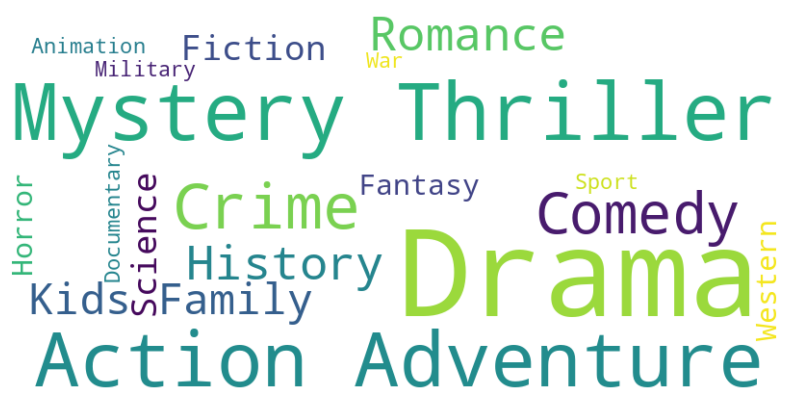

In [ ]:
# Top Movies Genres

all_genres = ' '.join(filtered_df_movies['Genre'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

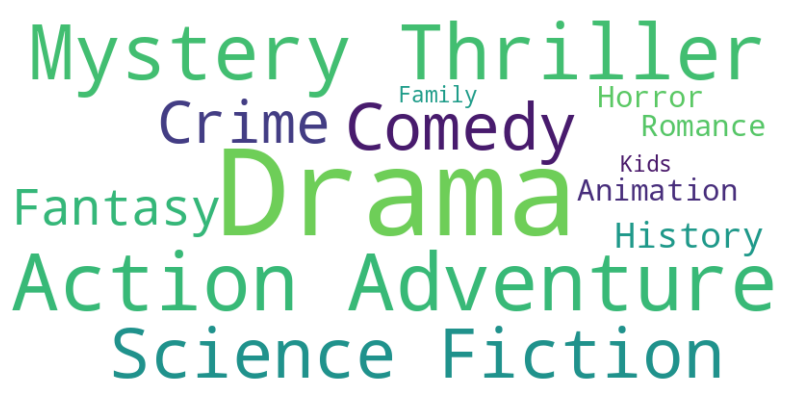

In [ ]:
# Top TV shows Genres

all_genres = ' '.join(filtered_df_tv_shows['Genre'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Finding Predominant Streaming Service**

In [ ]:
# Funtion for Finding  Movies / Tv Shows Predominant Streaming Service

def visualize_streaming_distribution_wordcloud(df):
    # Filter streaming information available
    streaming_platforms = df[df['Streaming Platform'] != 'Not Available for Streaming.']['Streaming Platform']

    # Create a string of streaming platforms
    streaming_text = ' '.join(streaming_platforms)

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(streaming_text)

    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Streaming Service Distribution - Word Cloud')
    plt.show()

    # Identify the predominant streaming service
    predominant_service = streaming_platforms.mode().iloc[0]
    print(f"The predominant streaming service is: {predominant_service}")


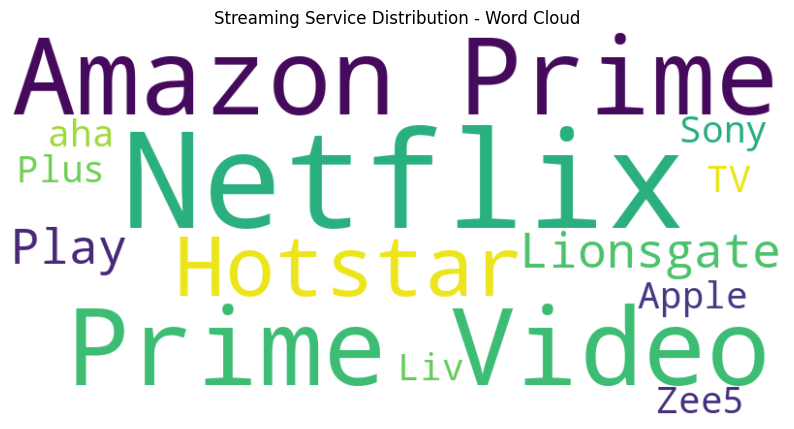

The predominant streaming service is: Amazon Prime Video


In [ ]:
# Visualizing Movies Predominant Streaming Platform using Word Cloud

visualize_streaming_distribution_wordcloud(filtered_df_movies)

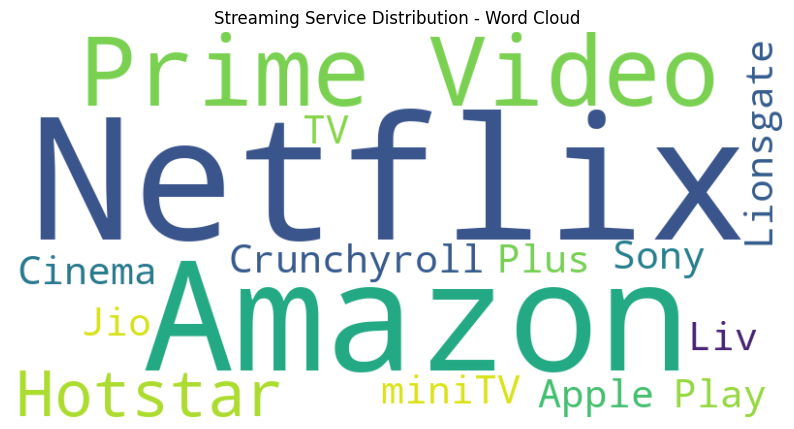

The predominant streaming service is: Netflix


In [ ]:
# Visualizing Tv Shows Predominant Streaming Platform using Word Cloud

visualize_streaming_distribution_wordcloud(filtered_df_tv_shows)

## **Task 3 :- Data Export**

In [ ]:
# Saving Final Movies/Tv Shows dataframe as Final Data in csv format

df_movies.to_csv('Final_Movies_Data.csv', index=False)
df_tv_shows.to_csv('Final_Tv_Shows_Data.csv', index=False)

In [ ]:
# Saving Filtered Movies/Tv Shows dataframe as Filtered Data in csv format

filtered_df_movies.to_csv('Filtered_Movies_Data.csv', index=False)
filtered_df_tv_shows.to_csv('Filtered_Tv_Shows_Data.csv', index=False)

# **Project Completed.**